In [0]:
!pip install seaborn==0.9.0


     |████████████████████████████████| 215kB 1.4MB/s 
  Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [0]:
# To keep the page organized do all imports here
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
sns.set()

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_table('studentsperformance', con=engine)
engine.dispose()
students_df.info()
students_df.describe()
students_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


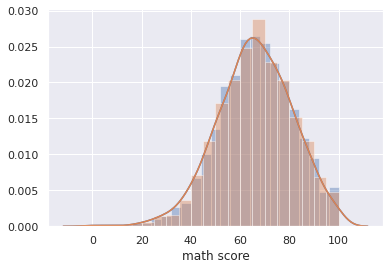

In [0]:
# understanding distribution with histograms
ax = sns.distplot(students_df['math score'])
ax20 = sns.distplot(students_df['math score'], bins = 20)

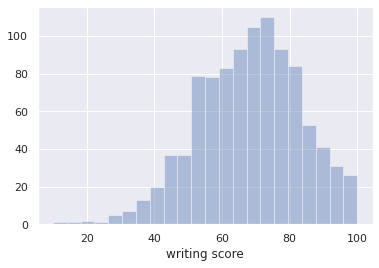

In [0]:
ax_writing = sns.distplot(students_df['writing score'], kde = False)

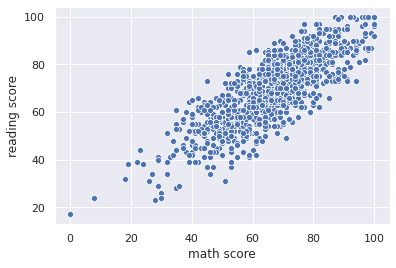

In [0]:
# Comparing the distribution of two variables
# use the scatterplot()
sns.scatterplot(x='math score', y='reading score', data=students_df)

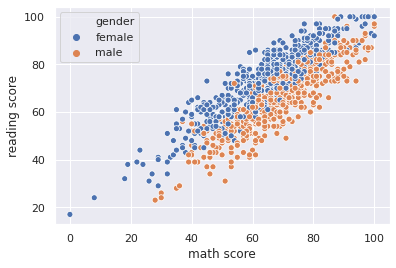

In [0]:
# take the gender variable into consideration
sns.scatterplot(x='math score', y='reading score', hue='gender', data=students_df)

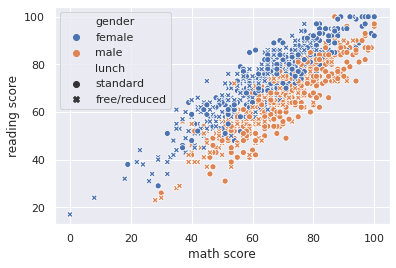

In [0]:
# Does the type of lunch have any effect? - vary the type of makers and the colors to show grouping by two different variables.
sns.scatterplot(x='math score', y = 'reading score', hue='gender', style = 'lunch', data=students_df)


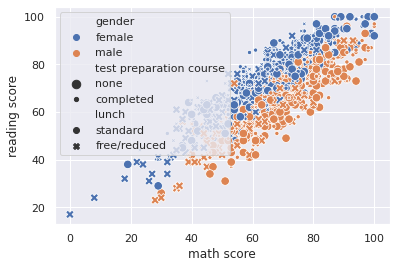

In [0]:
# Does the completion of the preparation course matter?
sns.scatterplot(x='math score', y = 'reading score', hue='gender', style ='lunch', size = 'test preparation course', data=students_df)

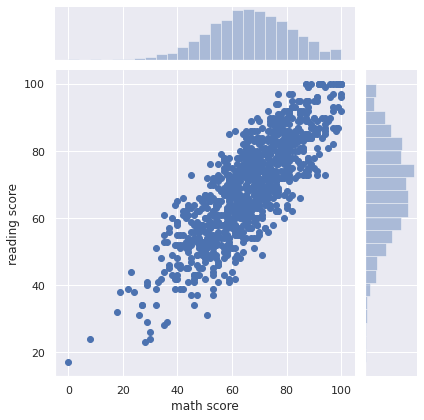

In [0]:
# it is possible to combine the histogram and scatterplot to see both the individual distributions as well as the relative distributions.
sns.jointplot(x='math score', y = 'reading score', data=students_df)

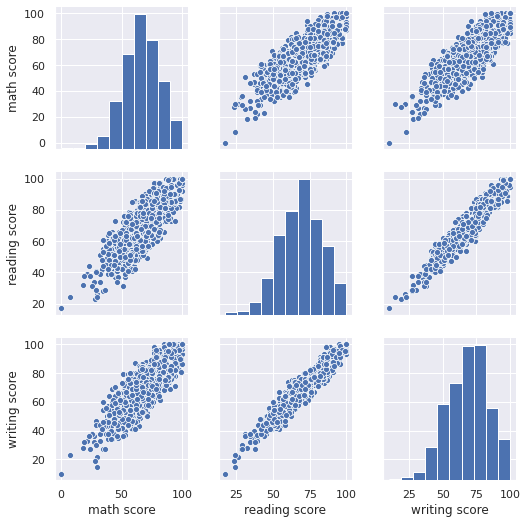

In [0]:
# To plot multiple distributions in the dataset, use the pairplot() function. It will compare all variables against each other.
sns.pairplot(students_df)


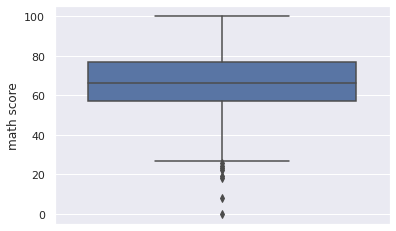

In [0]:
#Box Plots
# let's examine distributions with respect to categories. as we added categorical variables, the plots became progressively harder to interpret. 
# we could use a box plot to compare variables by category
sns.boxplot(y='math score', data=students_df)

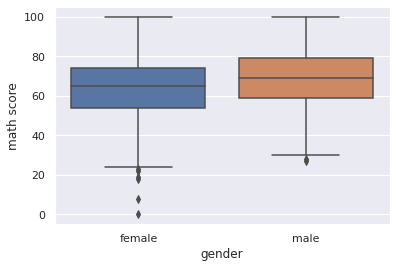

In [0]:
# How are math scores distributed across genders?
sns.boxplot(y='math score', x = 'gender', data=students_df)

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

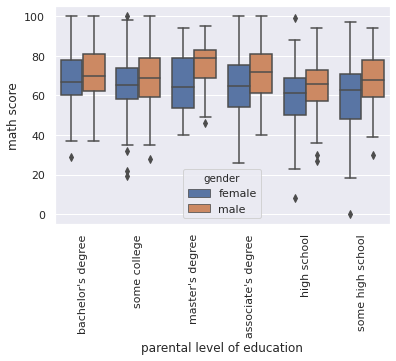

In [0]:
# How are math scores affected by parents edu and gender? To properly display the labels on the x asis we will rotate them.
ax = sns.boxplot(y='math score', hue='gender',x='parental level of education', data=students_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation =90)

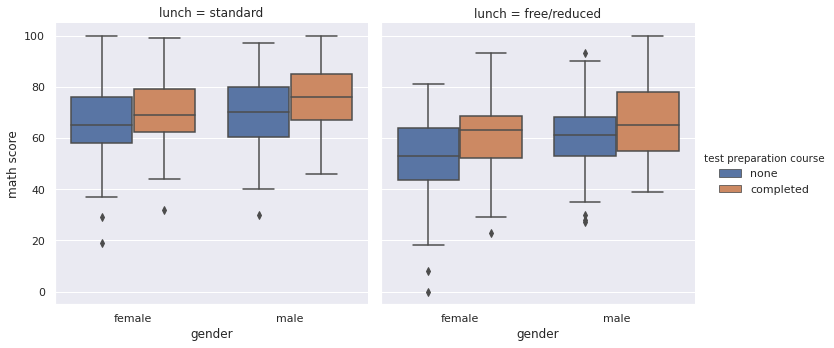

In [0]:
# with box plot, it's easier to compare the means of the various categories, and the range of values.
# try preparation course
sns.catplot(y= 'math score', x='gender', hue = 'test preparation course', col='lunch', kind = 'box', data=students_df)


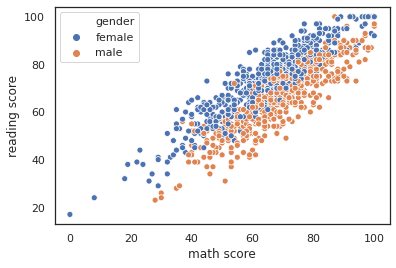

In [0]:
# custom plots in seaborn 
# see the most common options for customizing a chart
# sns.set_style() - all following plots will be charted based on the theme.
sns.set_style('white')
sns.scatterplot(x='math score', y = 'reading score', hue='gender', data=students_df)

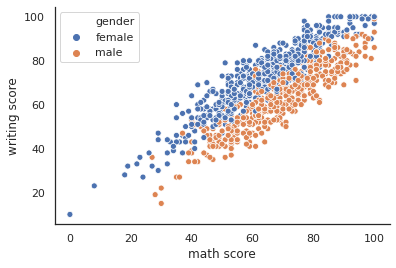

In [0]:
# get rid of the box
sns.scatterplot(x='math score', y = 'writing score', hue='gender', data=students_df)
sns.despine()

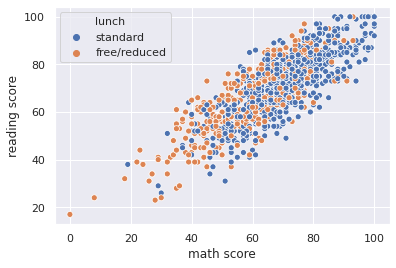

In [0]:
# if not modified all the following plots will using the current theme. 
# use sns.set() to restore default settings
sns.set()
sns.scatterplot(x='math score', y='reading score', hue='lunch', data=students_df)

In [0]:
#customizing seaborn plots with matplotlib.pyplot
